In [1]:
import os

imgs = os.listdir()

app_logos = [img for img in imgs if img.endswith(".png") and img.startswith("app")]
module_logos = [img for img in imgs if img.endswith(".png") and img.startswith("module")]
prog_logos = [img for img in imgs if img.endswith(".png") and img.startswith("prog")]

len(app_logos), len(module_logos), len(prog_logos)


(9, 14, 6)

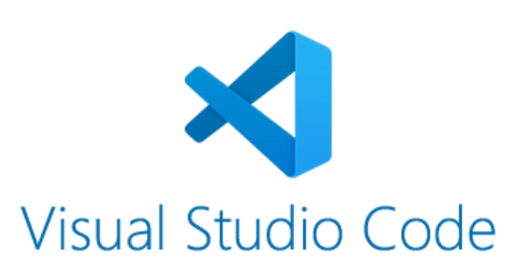

In [5]:
# display image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(img_path):
    img = mpimg.imread(img_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()
show_image(app_logos[3])

In [8]:
# apply a monochrome - purple filter on each png without loosing png format 
from PIL import Image


def apply_monochrome_filter(img_path):
    save_path = os.path.basename(img_path).split(".")[0] + "_monochrome.png"
    img = Image.open(img_path).convert("L")  # Convert to grayscale
    img = img.convert("RGB")  # Convert back to RGB to apply color
    r, g, b = img.split()
    img = Image.merge("RGB", (r, g, b))  # Keep the red channel for monochrome effect
    img.save(save_path)
    return save_path

path_saved = apply_monochrome_filter(app_logos[3])
plot_image = mpimg.imread(path_saved)

c:\Users\myalla\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
def black_to_gray(img_path, output_path=None, gray_level=150):
    """
    Convert black parts of a PNG to a gray tone, keeping transparency.

    Args:
        img_path (str): Input PNG file path.
        output_path (str): Output file path (defaults to original name + _gray.png).
        gray_level (int): 0-255 grayscale intensity (default 150 = medium gray).
    """
    # Open image as RGBA (preserve alpha)
    img = Image.open(img_path).convert("RGBA")
    pixels = img.load()

    for y in range(img.height):
        for x in range(img.width):
            r, g, b, a = pixels[x, y]
            # Only change non-transparent pixels
            if a > 0:
                # Detect dark/black pixels
                if r < 50 and g < 50 and b < 50:
                    pixels[x, y] = (gray_level, gray_level, gray_level, a)

    # Save output
    if not output_path:
        base, ext = os.path.splitext(img_path)
        output_path = f"{base}_gray.png"
    img.save(output_path, "PNG")
    # print(f"Saved: {output_path}")

In [18]:
for img in app_logos:
    black_to_gray(img)

for img in module_logos:
    black_to_gray(img)

for img in prog_logos:
    black_to_gray(img)

In [29]:
from PIL import Image
import os

def apply_monochrome_filter(img_path, tint_color=(128, 0, 128)):
    """
    Apply a monochrome purple filter to a PNG while preserving transparency.

    Args:
        img_path (str): Path to input PNG file.
        output_path (str): Path to save the output PNG file. Defaults to same dir with '_purple' suffix.
        tint_color (tuple): RGB color tuple for monochrome (default = purple).
    """
    file_name = os.path.basename(img_path).replace('_gray', '')
    output_path = file_name.split(".")[0] + "_monochrome.png"
    
    # Open the image
    img = Image.open(img_path).convert("RGBA")
    r, g, b, a = img.split()  # separate alpha

    # Convert to grayscale
    gray = Image.merge("RGB", (r, g, b)).convert("L")

    # Create a new image with the tint color
    colored = Image.new("RGBA", img.size)
    for y in range(img.height):
        for x in range(img.width):
            intensity = gray.getpixel((x, y)) / 255.0
            tr = int(tint_color[0] * intensity)
            tg = int(tint_color[1] * intensity)
            tb = int(tint_color[2] * intensity)
            colored.putpixel((x, y), (tr, tg, tb, a.getpixel((x, y))))

    colored.save(output_path, "PNG")
    # print(f"Saved: {output_path}")



In [30]:
imgs = os.listdir()

app_logos = [img for img in imgs if img.endswith(".png") and img.startswith("app") and img.endswith("_gray.png")]
module_logos = [img for img in imgs if img.endswith(".png") and img.startswith("module") and img.endswith("_gray.png")]
prog_logos = [img for img in imgs if img.endswith(".png") and img.startswith("prog") and img.endswith("_gray.png")]

len(app_logos), len(module_logos), len(prog_logos)

(9, 14, 6)

In [31]:
for img in app_logos:
    apply_monochrome_filter(img, tint_color=(225, 225, 225))

for img in module_logos:
    apply_monochrome_filter(img, tint_color=(225, 225, 225))

for img in prog_logos:
    apply_monochrome_filter(img, tint_color=(225, 225, 225))

In [ ]:
# imgs = os.listdir()

# app_logos = [img for img in imgs if img.endswith(".png") and img.startswith("app") and img.endswith("_gray_monochrome.png")]
# module_logos = [img for img in imgs if img.endswith(".png") and img.startswith("module") and img.endswith("_gray_monochrome.png")]
# prog_logos = [img for img in imgs if img.endswith(".png") and img.startswith("prog") and img.endswith("_gray_monochrome.png")]

# len(app_logos), len(module_logos), len(prog_logos)

# # delete all these images
# for img in app_logos + module_logos + prog_logos:
#     os.remove(img)

(9, 14, 6)

# RESIZE to 256 height

In [4]:
import os
from PIL import Image
# RESIZE to 256 height
def resize_images_rewrite(image_paths):
    """
    Resize images to a height of 256 pixels while maintaining aspect ratio, if they are larger than 256
    """
    for image_path in image_paths:
        if os.path.exists(image_path):
            with Image.open(image_path) as img:
                if img.height > 256:
                    img.thumbnail((256, 256))
                    img.save(image_path)


In [ ]:

all_images = [i for i in os.listdir() if i.endswith(".png")]
resize_images_rewrite(all_images)

In [5]:
import os
from PIL import Image
# RESIZE to 256 height
all_images = [i for i in os.listdir("..") if i.endswith(".png")]
print(all_images)

['agenticai.png', 'ai-brain.png', 'bg.png', 'chat.png', 'devices.png', 'exp1.png', 'exp2.png', 'exp3.png', 'exp_factset.png', 'exp_iiith.png', 'exp_nutanix.png', 'fav.png', 'fb.png', 'genai.png', 'gold-star.png', 'insta.png', 'jsm-logo.png', 'linkedin.png', 'ml-model.png', 'nlp-chat.png', 'opencv.png', 'person.png', 'seo.png', 'star.png', 'time.png', 'x.png']


In [6]:
resize_images_rewrite(all_images)

In [7]:
all_images = [i for i in os.listdir("../projects") if i.endswith(".png") and i.startswith("sm_")]
print(all_images)

['sm_mtech-thesis.png', 'sm_paper_carbon_farming.png', 'sm_project_default.png', 'sm_project_gen_names.png', 'sm_project_pothole_detection.png', 'sm_project_yt_sentiment.png', 'sm_project_zero_shot.png']


In [8]:
resize_images_rewrite(all_images)